### Importing Libraries

In [26]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

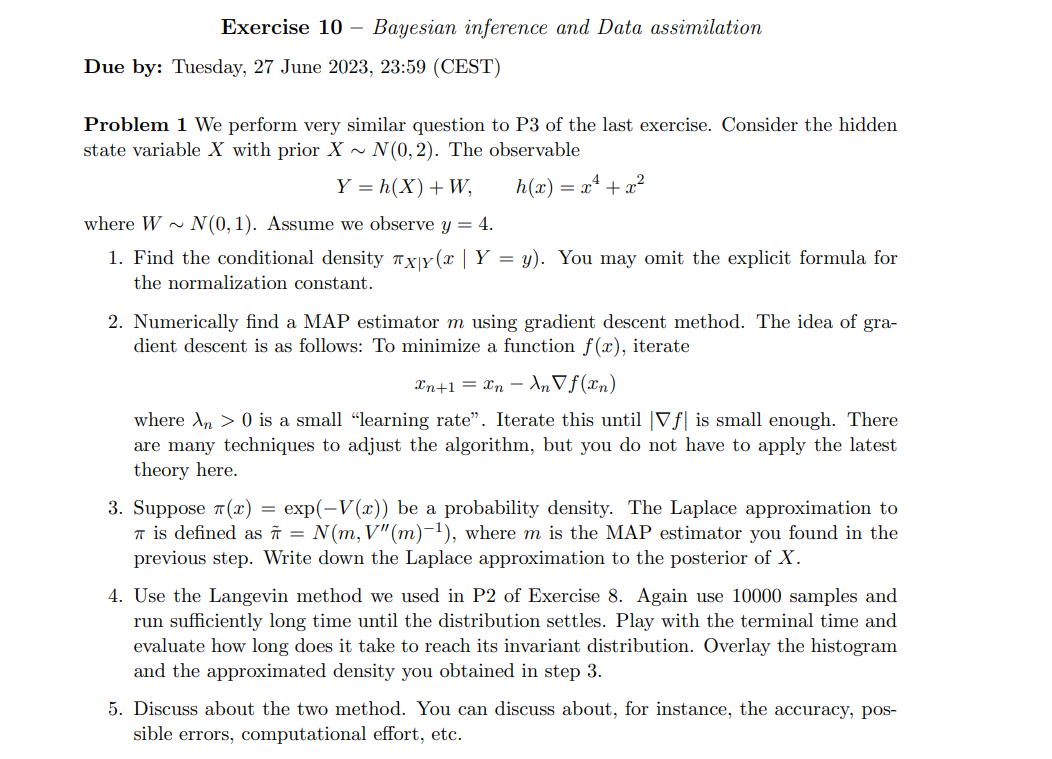

### Problem 1.2

- Observing the MAP's via the diagram

In [18]:
def posterior_density(x,y):
    return (1/(np.sqrt(8))*(np.pi**2)) * np.exp((-1/2) * ((y-np.power(x,4)-np.power(x,2))**2 + x**2))

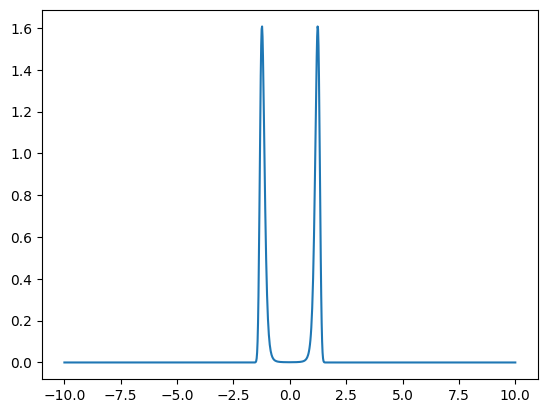

In [26]:
x = np.linspace(-10,10,1000)
y = 4
z = posterior_density(x,y)
plt.plot(x,z)
plt.show()

In [27]:
MAP=-10+np.argmax(z)*0.02
print("Maximum a posteriori estimator: ", MAP)

Maximum a posteriori estimator:  -1.2400000000000002


In [28]:
arr = z

# Get the maximum value in the array
max_val = np.max(arr)

# Get the indices of all maximum elements
max_indices = -10 + np.where(arr == max_val)[0]*0.02

print(max_indices)

[-1.24  1.22]


- Finding the same Map's via gradient descent

In [69]:
def f(x, y):
    return -np.exp((-1/2)*((y-x**4-x**2)**2 + x**2))

def df_dx(x, y):
    return (2*x - (y - x**4 - x**2) * (-1*4*x**3 - 2*x)) * f(x, y)

def gradient_descent(x, y, learning_rate, tolerance):
    while True:
        gradient = df_dx(x, y)
        update = learning_rate * gradient
        if np.abs(update) <= tolerance:
            break
        x -= update
    return x

# Set the initial value of x and y
x_initial_1 = -1.0
x_initial_2 = 1.0
y = 4.0

# Set the learning rate and tolerance
learning_rate = 0.1
tolerance = 1e-5

# Perform gradient descent
x_optimized_1 = gradient_descent(x_initial_1, y, learning_rate, tolerance)
x_optimized_2 = gradient_descent(x_initial_2, y, learning_rate, tolerance)

# Print the optimized value of x
print("Optimized x_1 MAP:", x_optimized_1)
print("Optimized x_2 MAP:", x_optimized_2)

Optimized x_1 MAP: -1.2720177598580924
Optimized x_2 MAP: 1.2720177598580924


### Problem 1.3
#### Considering $V(x) = \frac{((y-x^4-x^2)+x^2))}{2}$
#### $V'(x) = (x + (y - x^4 - x^2).(-4x^3-2x))$
#### We will have $V"(x) = (1+(28x^6+30x^4+6x^2-2y-12x^2y))$
#### We will have 2 approximations for 2 different MAP's m values i.e. -1.272 and 1.272 with $N(m,(V''(m))^{-1})$
#### For m = 1.272 and m = -1.272, the variance is 0.0082
#### Therefore the laplace approximation for prior $\pi(x)$ are $\frac{1}{\sqrt{2\pi*0.0082}} * e^\frac{-1*(x-1.27)^2}{2*0.0082}$

In [21]:
def equation(x, y):
    return 1/(1 + (28*(x**6) + 30*(x**4) + 6*(x**2) - 2*y - 12*(x**2)*y))
z1 = equation(x = 1.272, y = 4)
z2 = equation(x = -1.272, y = 4)

In [22]:
z1,z2

(0.008184662407678735, 0.008184662407678735)

### Problem 1.4

In [23]:
dt = 0.01
T = 100
X = np.arange(-100, T + dt, dt)

var = 120
m = 1.27
def pi(x,var,m):
    val = ((x - 4) ** 2 - 2) ** 2
    prob = (1 /np.sqrt(2*np.pi*var))*np.exp((-1/(2*var))*(x-m)**2)
    return prob

# Vectorized calculation
Y = pi(X,var,m)

In [24]:
ind_1 = np.argmax(Y)
X[ind_1]

1.2700000000518088

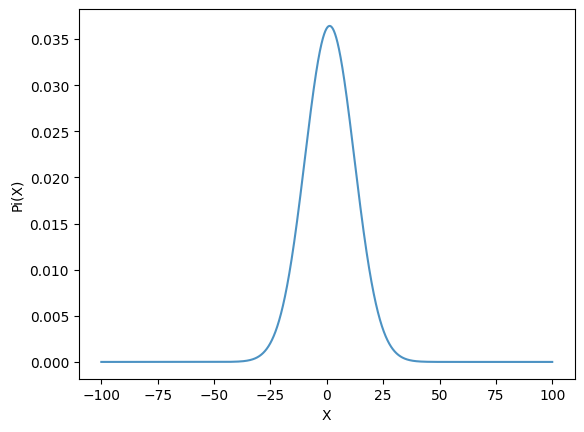

In [27]:
fig, axs = plt.subplots()
sns.lineplot(x = X,y=Y,alpha=0.8, ax = axs)
axs.set(xlabel = "X", ylabel = "Pi(X)")
plt.show()

In [41]:
def hist_plt(time_points, sim_mat, bins, alp: float):
    num_plots = len(time_points)
    num_rows = int(np.ceil(np.sqrt(num_plots)))
    num_cols = int(np.ceil(num_plots / num_rows))
    
    # Get a colormap
    cmap = plt.get_cmap('tab10')
    
    # Get the corresponding colors from the colormap
    colors = [cmap(i % 10) for i in range(len(time_points))]
    
    # Iterate over the time points and plot histograms
    fig, axs = plt.subplots(num_rows, num_cols,figsize = (20,18))
    axs = axs.ravel()
    for i, t in enumerate(time_points):
        # Get the corresponding index in T
        t_index = int(t / dt)
        # Extract the values at the given time point
        if t_index > 0:
            values = sim_mat[:, t_index - 1]
        else:
            values = sim_mat[:, t_index]
    
        # Plot histogram with the random color
        sns.histplot(values, bins=bins, kde=True, alpha=alp, label=f't = {t}', color=colors[i], ax=axs[i], stat = 'density')
    
        # Add labels and legend
        axs[i].set(xlabel='Value', ylabel='Frequency')
        axs[i].legend()
    
    # Plot the normal distribution
    samples = np.random.randn(10000)
    i = len(time_points)
    sns.histplot(samples, bins=bins, kde=True, alpha=alp, label='Normal Distribution', color=cmap(i), ax=axs[i])
    axs[i].set(ylabel='Frequency')
    axs[i].legend()
    
    plt.tight_layout()
    plt.show()


In [49]:
final_t = 100
dt = 0.01
x_n = -1 # value for x_0
num_sim = 10_000 #Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) #list or time steps to observe value on, we start with dt, since we are prefilling with x_0 already.

sim_mat = np.empty((num_sim,len(T)+1),dtype = 'float32') # Matrix to store each of 10K simulated processes

sim_mat[:, 0] = x_n #Settign initial x_0 for every simulation i.e value at t = 0
sim_mat[:,0], sim_mat.shape

# Simulating each individual process for dt time steps till final_t
vals = sim_mat[:, 0]  # Initial values

for i in range(1, len(T) + 1):
    # Compute val_tr for all simulations
    
    val_tr = (vals + (4 - vals**4 - vals**2) * (-4*vals**3 - 2*vals)) * dt
    
    # Generate all random numbers for this iteration
    random_nums = np.sqrt(2 * dt) * np.random.randn(num_sim)
    
    # Compute the new values for all simulations at once
    x_n_1 = vals - val_tr + random_nums
    
    # Update vals with the new values for the next iteration
    vals = x_n_1
    
    # Setting the columns at nth time step with the obtained value
    sim_mat[:, i] = x_n_1

/tmp/ipykernel_28570/2789689647.py:31: RuntimeWarning: overflow encountered in cast
  sim_mat[:, i] = x_n_1
/tmp/ipykernel_28570/2789689647.py:19: RuntimeWarning: overflow encountered in multiply
  val_tr = (vals + (4 - vals**4 - vals**2) * (-4*vals**3 - 2*vals)) * dt
/tmp/ipykernel_28570/2789689647.py:25: RuntimeWarning: invalid value encountered in subtract
  x_n_1 = vals - val_tr + random_nums
/tmp/ipykernel_28570/2789689647.py:19: RuntimeWarning: overflow encountered in power
  val_tr = (vals + (4 - vals**4 - vals**2) * (-4*vals**3 - 2*vals)) * dt
/tmp/ipykernel_28570/2789689647.py:19: RuntimeWarning: overflow encountered in square
  val_tr = (vals + (4 - vals**4 - vals**2) * (-4*vals**3 - 2*vals)) * dt


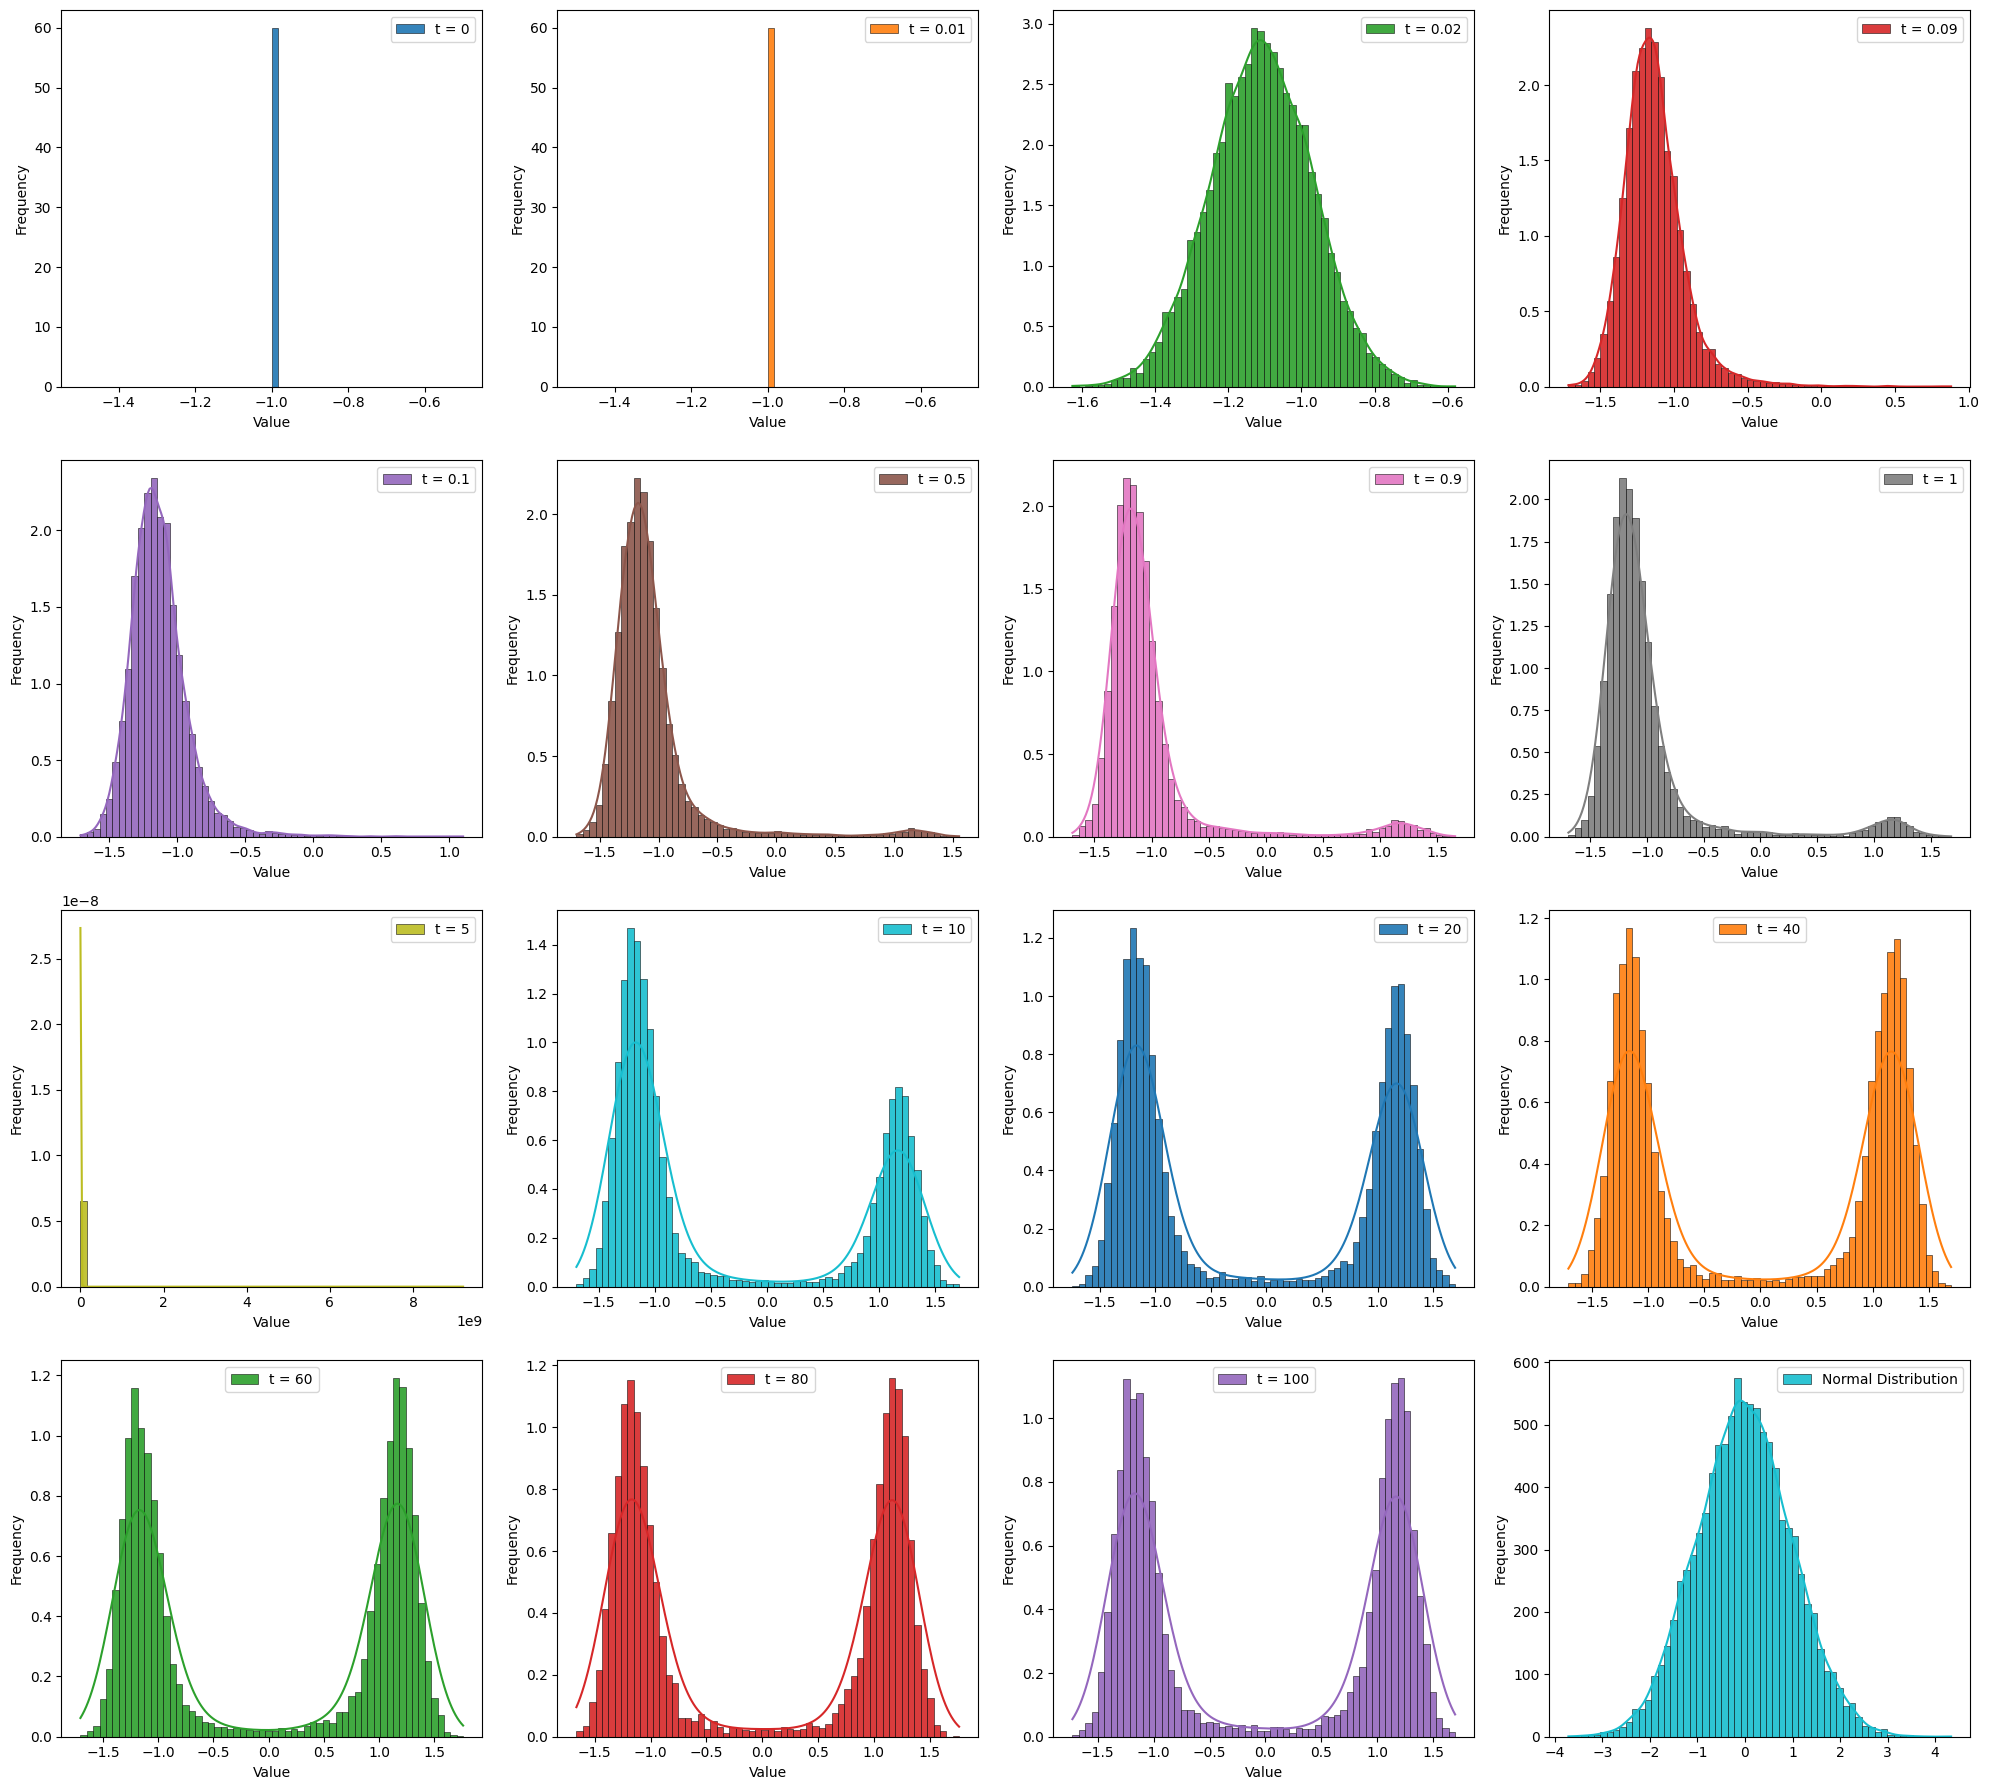

In [50]:
# If we begin at X_n = -1
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, sim_mat,60,alp=0.9)

In [51]:
final_t = 100
dt = 0.01
x_n = 1 # value for x_0
num_sim = 10_000 #Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) #list or time steps to observe value on, we start with dt, since we are prefilling with x_0 already.

sim_mat = np.empty((num_sim,len(T)+1),dtype = 'float32') # Matrix to store each of 10K simulated processes

sim_mat[:, 0] = x_n #Settign initial x_0 for every simulation i.e value at t = 0
sim_mat[:,0], sim_mat.shape

# Simulating each individual process for dt time steps till final_t
vals = sim_mat[:, 0]  # Initial values

for i in range(1, len(T) + 1):
    # Compute val_tr for all simulations
    
    val_tr = (vals + (4 - vals**4 - vals**2) * (-4*vals**3 - 2*vals)) * dt
    
    # Generate all random numbers for this iteration
    random_nums = np.sqrt(2 * dt) * np.random.randn(num_sim)
    
    # Compute the new values for all simulations at once
    x_n_1 = vals - val_tr + random_nums
    
    # Update vals with the new values for the next iteration
    vals = x_n_1
    
    # Setting the columns at nth time step with the obtained value
    sim_mat[:, i] = x_n_1

/tmp/ipykernel_28570/1289377961.py:31: RuntimeWarning: overflow encountered in cast
  sim_mat[:, i] = x_n_1
/tmp/ipykernel_28570/1289377961.py:19: RuntimeWarning: overflow encountered in power
  val_tr = (vals + (4 - vals**4 - vals**2) * (-4*vals**3 - 2*vals)) * dt
/tmp/ipykernel_28570/1289377961.py:19: RuntimeWarning: overflow encountered in square
  val_tr = (vals + (4 - vals**4 - vals**2) * (-4*vals**3 - 2*vals)) * dt
/tmp/ipykernel_28570/1289377961.py:25: RuntimeWarning: invalid value encountered in subtract
  x_n_1 = vals - val_tr + random_nums
/tmp/ipykernel_28570/1289377961.py:19: RuntimeWarning: overflow encountered in multiply
  val_tr = (vals + (4 - vals**4 - vals**2) * (-4*vals**3 - 2*vals)) * dt


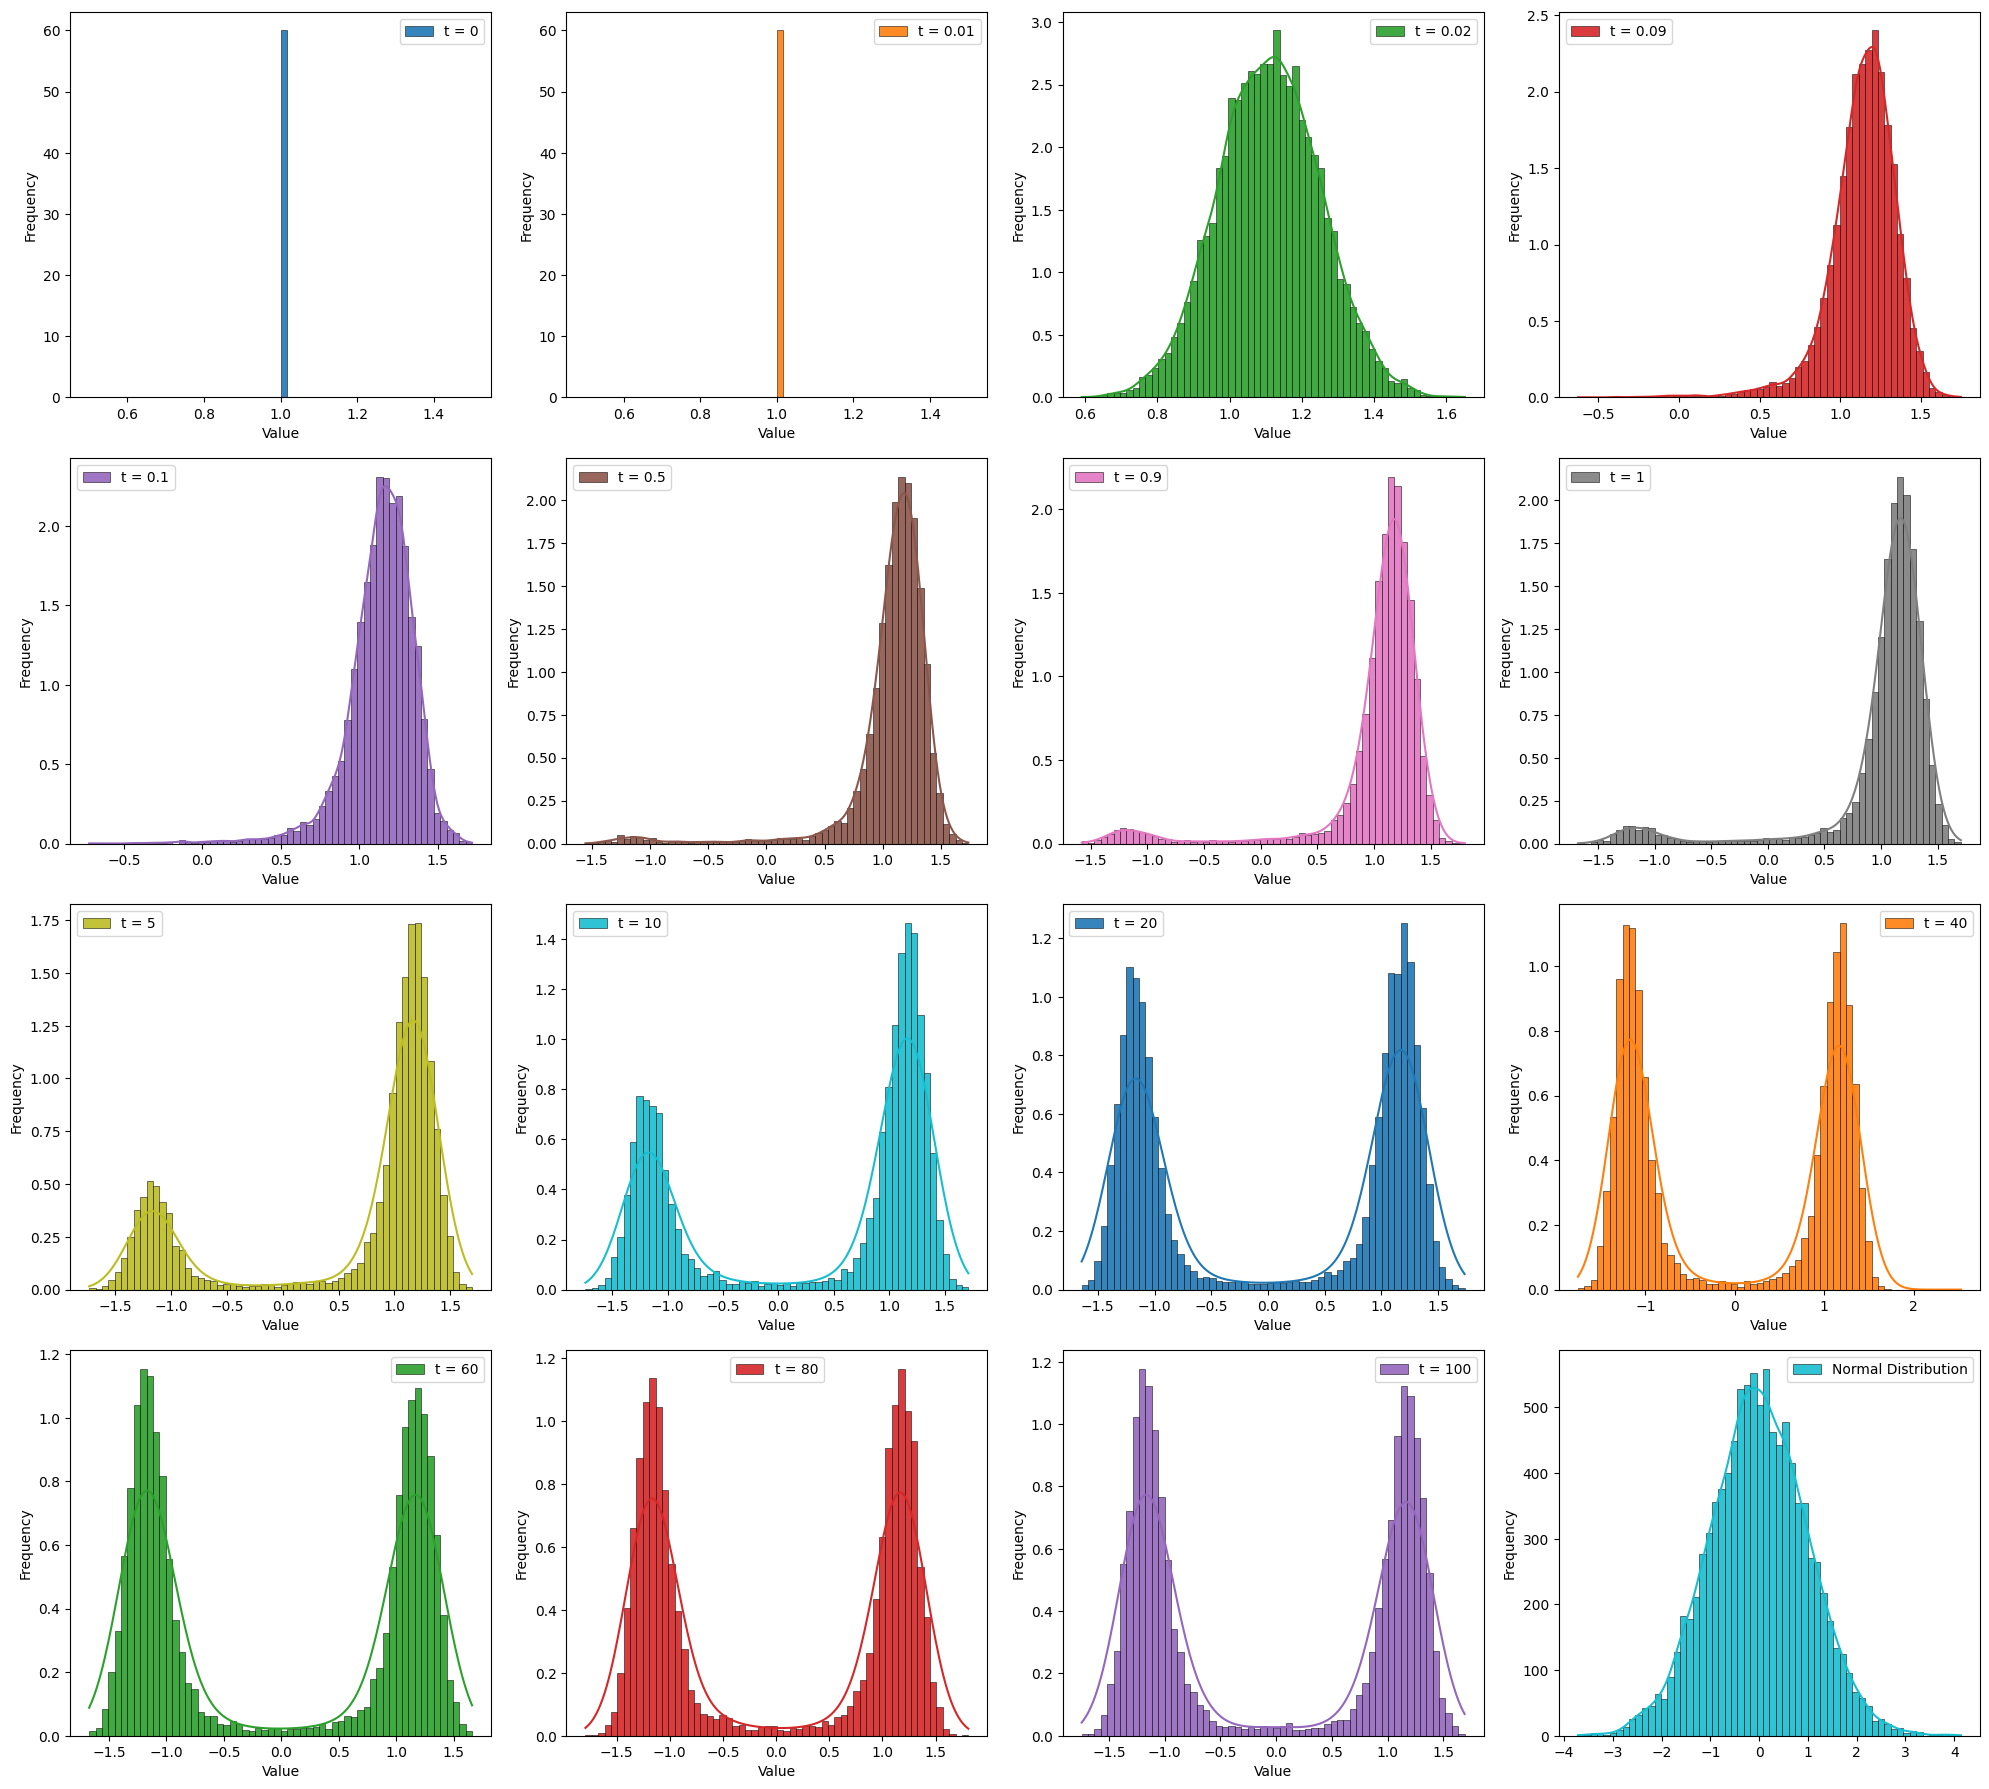

In [52]:
# If we begin at X_n = +1
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, sim_mat,60,alp=0.9)

### Problem 1.5

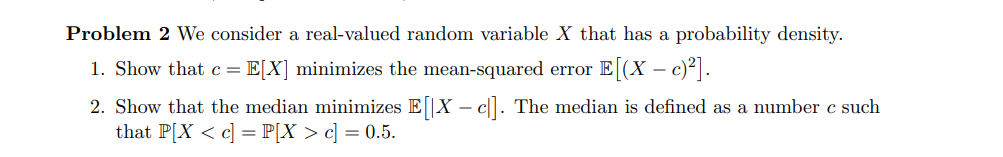

### Problem 2.1

### Problem 2.2

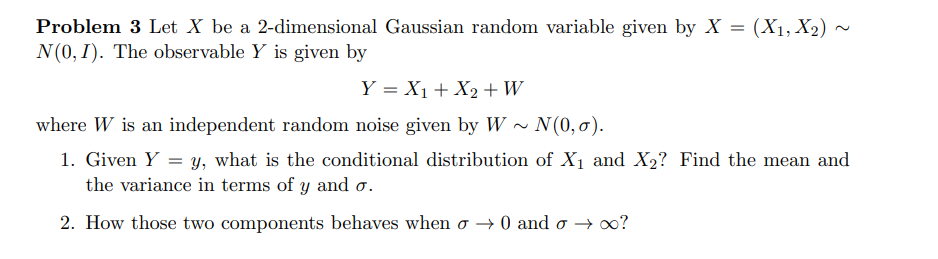